**Training Deep Neural Networks**

This notebook is inspired from the handson-ml2 GitHub repository by Aurélien Geron

https://github.com/ageron/handson-ml2

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Vanishing/Exploding Gradients Problem

In [2]:
# defining the Logit function
def logit(z):
    return 1 / (1 + np.exp(-z))

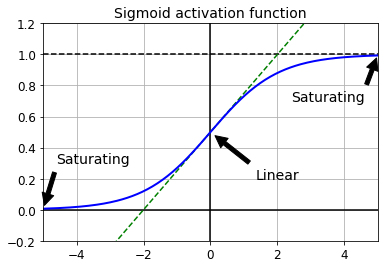

In [3]:
# plotting the Logit function
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2) # calling the Logit function we created
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## Xavier and He Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")] # sneak peek at the Keras initializers

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal") # He Initialization

In [6]:
# He initialization with a uniform distribution but based on fan(avg) rather than fan(in)
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [8]:
keras?

In [7]:
help(keras)

Help on package tensorflow_core.python.keras.api._v2.keras in tensorflow_core.python.keras.api._v2:

NAME
    tensorflow_core.python.keras.api._v2.keras - Implementation of the Keras API meant to be a high-level API for TensorFlow.

DESCRIPTION
    Detailed documentation and user guides are available at
    [keras.io](https://keras.io).

PACKAGE CONTENTS
    activations (package)
    applications (package)
    backend (package)
    callbacks (package)
    constraints (package)
    datasets (package)
    estimator (package)
    experimental (package)
    initializers (package)
    layers (package)
    losses (package)
    metrics (package)
    mixed_precision (package)
    models (package)
    optimizers (package)
    premade (package)
    preprocessing (package)
    regularizers (package)
    utils (package)
    wrappers (package)

VERSION
    2.2.4-tf

FILE
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/tensorflow_core/python/keras/api/_v2/keras/__init__.py




## Nonsaturating Activation Functions

### Leaky ReLU

In [19]:
# defining the Leaky ReLU activation function
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

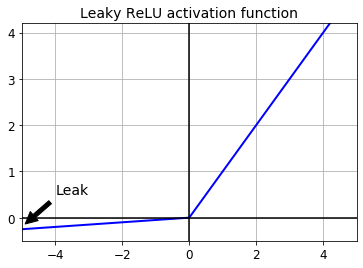

In [20]:
# plotting the Leaky ReLU activation function
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2) # calling the Leaky ReLU we created
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [21]:
[m for m in dir(keras.activations) if not m.startswith("_")] # sneak peek at Keras activation functions

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [22]:
[m for m in dir(keras.layers) if "relu" in m.lower()] # sneak peek at all Keras ReLU activation functions

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [4]:
# loading the Fashion-MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# trimming the data since it takes lot of time
X_train_full = X_train_full[:30000]
y_train_full = y_train_full[:30000]

X_test = X_test[:5000]
y_test = y_test[:5000]

# scaling the dataset
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# dividing the dataset into traingin and validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
X_test.shape # checking shape of test set

(5000, 28, 28)

In [25]:
tf.random.set_seed(42) # setting random
np.random.seed(42)

# defining the model with Keras Sequential API
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # flatten the input
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [15]:
# training the model
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 110us/sample - loss: 1.6048 - accuracy: 0.5398 - val_loss: 1.1907 - val_accuracy: 0.6732
Epoch 2/5
25000/25000 [==============================] - 2s 86us/sample - loss: 1.0450 - accuracy: 0.6806 - val_loss: 0.9159 - val_accuracy: 0.7106
Epoch 3/5
25000/25000 [==============================] - 2s 81us/sample - loss: 0.8680 - accuracy: 0.7164 - val_loss: 0.8020 - val_accuracy: 0.7396
Epoch 4/5
25000/25000 [==============================] - 2s 79us/sample - loss: 0.7790 - accuracy: 0.7404 - val_loss: 0.7317 - val_accuracy: 0.7618
Epoch 5/5
25000/25000 [==============================] - 2s 77us/sample - loss: 0.7227 - accuracy: 0.7565 - val_loss: 0.6872 - val_accuracy: 0.7712


Now let's try PReLU:

In [16]:
# creating a new model with Parametric ReLU (PReLU)
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [16]:
# training the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 86us/sample - loss: 0.6820 - accuracy: 0.7713 - val_loss: 0.6529 - val_accuracy: 0.7796
Epoch 2/20
25000/25000 [==============================] - 2s 87us/sample - loss: 0.6507 - accuracy: 0.7837 - val_loss: 0.6248 - val_accuracy: 0.7934
Epoch 3/20
25000/25000 [==============================] - 2s 87us/sample - loss: 0.6253 - accuracy: 0.7934 - val_loss: 0.6059 - val_accuracy: 0.7966
Epoch 4/20
25000/25000 [==============================] - 2s 87us/sample - loss: 0.6047 - accuracy: 0.7988 - val_loss: 0.5856 - val_accuracy: 0.8074
Epoch 5/20
25000/25000 [==============================] - 2s 87us/sample - loss: 0.5873 - accuracy: 0.8070 - val_loss: 0.5711 - val_accuracy: 0.8118
Epoch 6/20
25000/25000 [==============================] - 2s 81us/sample - loss: 0.5721 - accuracy: 0.8119 - val_loss: 0.5574 - val_accuracy: 0.8160
Epoch 7/20
25000/25000 [==============================] -

### ELU

In [31]:
# defining the ELU activation function
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

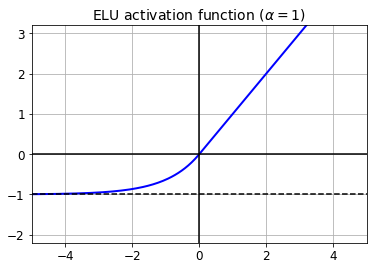

In [32]:
# plotting the ELU activation function
plt.plot(z, elu(z), "b-", linewidth=2) # calling the ELU function we created above
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [33]:
keras.layers.Dense(10, activation="elu")

### SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [34]:
# complementary error function, 1 - erf(x)
# calculates the complementary error
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [35]:
scale_0_1

1.0507009873554805

In [36]:
# defining the SeLU activation function
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

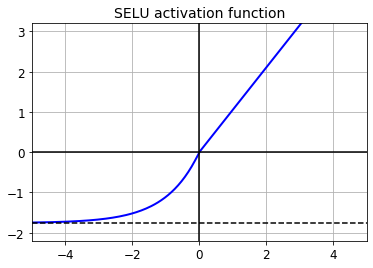

In [37]:
# plotting the SeLU activation function
plt.plot(z, selu(z), "b-", linewidth=2) # calling the SeLU function created
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [38]:
Z = np.random.normal(size=(500, 100)) # standardized inputs

In [39]:
# plotting the mean, and the standard deviation for each layer
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Using SELU is easy:

In [40]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal") # using SeLU with LeCun initialization

Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [41]:
# setting seed value
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
# creating the model using Keras Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [43]:
# compiling the model with sparse categorical crossentropy since
# the predicted labels are integers
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [12]:
# scaling the dataset
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [45]:
# training the model
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 564us/sample - loss: 1.4297 - accuracy: 0.4435 - val_loss: 0.9981 - val_accuracy: 0.5922
Epoch 2/5
25000/25000 [==============================] - 12s 464us/sample - loss: 0.9030 - accuracy: 0.6782 - val_loss: 0.8320 - val_accuracy: 0.7038
Epoch 3/5
25000/25000 [==============================] - 12s 467us/sample - loss: 0.7541 - accuracy: 0.7316 - val_loss: 0.6778 - val_accuracy: 0.7670
Epoch 4/5
25000/25000 [==============================] - 12s 479us/sample - loss: 0.6426 - accuracy: 0.7678 - val_loss: 0.6771 - val_accuracy: 0.7450
Epoch 5/5
25000/25000 [==============================] - 12s 476us/sample - loss: 0.5929 - accuracy: 0.7829 - val_loss: 0.5787 - val_accuracy: 0.7936


Now look at what happens if we try to use the ReLU activation function instead:

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
# trying the same but this time using ReLU activation function
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
# compiling the model with sparse categorical crossentropy since
# the predicted labels are integers
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [35]:
# training the model
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 13s 536us/sample - loss: 2.0951 - accuracy: 0.1762 - val_loss: 1.8215 - val_accuracy: 0.2548
Epoch 2/5
25000/25000 [==============================] - 11s 429us/sample - loss: 1.7270 - accuracy: 0.2868 - val_loss: 1.4027 - val_accuracy: 0.3760
Epoch 3/5
25000/25000 [==============================] - 10s 404us/sample - loss: 1.4346 - accuracy: 0.3838 - val_loss: 1.4180 - val_accuracy: 0.3866
Epoch 4/5
25000/25000 [==============================] - 10s 398us/sample - loss: 1.2763 - accuracy: 0.4471 - val_loss: 1.2220 - val_accuracy: 0.4914
Epoch 5/5
25000/25000 [==============================] - 10s 401us/sample - loss: 1.0971 - accuracy: 0.5343 - val_loss: 2.0695 - val_accuracy: 0.2992


Not great at all, we suffered from the vanishing/exploding gradients problem.

# Batch Normalization

In [5]:
# creating a model
# applying BN after every hidden layer and as the first
# layer in the model (after flattening the input images)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.summary() # generating model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [38]:
# checking model layer details
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

When you create a BN layer in Keras, it also creates two operations that will be called by Keras at each iteration during training. These operations will update the moving averages. Since we are using the TensorFlow backend, these operations are
TensorFlow operations.

In [39]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [40]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [41]:
# training the model
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 148us/sample - loss: 1.1163 - accuracy: 0.6348 - val_loss: 0.6784 - val_accuracy: 0.7850
Epoch 2/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.6911 - accuracy: 0.7693 - val_loss: 0.5644 - val_accuracy: 0.8168
Epoch 3/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.6019 - accuracy: 0.7940 - val_loss: 0.5149 - val_accuracy: 0.8336
Epoch 4/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.5578 - accuracy: 0.8080 - val_loss: 0.4857 - val_accuracy: 0.8414
Epoch 5/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.5281 - accuracy: 0.8190 - val_loss: 0.4644 - val_accuracy: 0.8486


Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [42]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [44]:
# training the model
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 146us/sample - loss: 1.2789 - accuracy: 0.5919 - val_loss: 0.8500 - val_accuracy: 0.7380
Epoch 2/5
25000/25000 [==============================] - 3s 116us/sample - loss: 0.8398 - accuracy: 0.7370 - val_loss: 0.6933 - val_accuracy: 0.7768
Epoch 3/5
25000/25000 [==============================] - 3s 121us/sample - loss: 0.7273 - accuracy: 0.7670 - val_loss: 0.6178 - val_accuracy: 0.7984
Epoch 4/5
25000/25000 [==============================] - 3s 118us/sample - loss: 0.6598 - accuracy: 0.7886 - val_loss: 0.5723 - val_accuracy: 0.8156
Epoch 5/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.6194 - accuracy: 0.7982 - val_loss: 0.5369 - val_accuracy: 0.8238


## Gradient Clipping

All Keras optimizers accept `clipnorm` or `clipvalue` arguments:

In [45]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [46]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

To ensure that Gradient Clipping does not change the direction of the gradient vector, you should clip by norm by setting clipnorm instead of clipvalue. This will clip the whole gradient if its ℓ2 norm is greater than the threshold you picked.

## Reusing Pretrained Layers

### Reusing a Keras model

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [30]:
# defining the dataset
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [31]:
X_train_A.shape # checking shape of training set A

(19875, 28, 28)

In [32]:
X_train_B.shape # checking shape of training set B

(200, 28, 28)

In [33]:
y_train_A[:30] # checking first 30 y-labels for training set A

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [51]:
y_train_B[:30] # checking first 30 y-labels for training set B

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [52]:
tf.random.set_seed(42)
np.random.seed(42)

In [34]:
# defining the model
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [36]:
# compiling the model
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [38]:
# training the model
history = model_A.fit(X_train_A, y_train_A, epochs=5,
                    validation_data=(X_valid_A, y_valid_A))

Train on 19875 samples, validate on 4014 samples
Epoch 1/5
19875/19875 [==============================] - 2s 87us/sample - loss: 0.3190 - accuracy: 0.8898 - val_loss: 0.3131 - val_accuracy: 0.8936
Epoch 2/5
19875/19875 [==============================] - 2s 87us/sample - loss: 0.3078 - accuracy: 0.8936 - val_loss: 0.3169 - val_accuracy: 0.8901
Epoch 3/5
19875/19875 [==============================] - 2s 86us/sample - loss: 0.2991 - accuracy: 0.8973 - val_loss: 0.3002 - val_accuracy: 0.8981
Epoch 4/5
19875/19875 [==============================] - 2s 86us/sample - loss: 0.2914 - accuracy: 0.8992 - val_loss: 0.2923 - val_accuracy: 0.9036
Epoch 5/5
19875/19875 [==============================] - 2s 93us/sample - loss: 0.2855 - accuracy: 0.9018 - val_loss: 0.2966 - val_accuracy: 0.8974


In [39]:
model_A.save("my_model_A.h5") # saving the model we created

In [47]:
# defining the model
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [48]:
# compiling the model with binary crossentropy
# that can accept either logits (i.e values from last linear node, z)
# or probabilities from the last Sigmoid node
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [49]:
# training the model
history = model_B.fit(X_train_B, y_train_B, epochs=5,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/5
200/200 [==============================] - 1s 3ms/sample - loss: 0.8651 - accuracy: 0.5000 - val_loss: 0.6488 - val_accuracy: 0.6136
Epoch 2/5
200/200 [==============================] - 0s 375us/sample - loss: 0.5740 - accuracy: 0.7300 - val_loss: 0.4993 - val_accuracy: 0.8154
Epoch 3/5
200/200 [==============================] - 0s 378us/sample - loss: 0.4585 - accuracy: 0.8750 - val_loss: 0.4267 - val_accuracy: 0.8763
Epoch 4/5
200/200 [==============================] - 0s 381us/sample - loss: 0.3941 - accuracy: 0.9250 - val_loss: 0.3760 - val_accuracy: 0.9047
Epoch 5/5
200/200 [==============================] - 0s 373us/sample - loss: 0.3472 - accuracy: 0.9250 - val_loss: 0.3371 - val_accuracy: 0.9239


In [55]:
model_A.summary() # generating model summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                

In [57]:
model_B.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_28 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [51]:
model_A = keras.models.load_model("my_model_A.h5") # loading our saved model
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) # creating new model based on existing layer
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid")) # adding new layer to new model

In [52]:
# model_A and model_B_on_A now share some layers. When you train
# model_B_on_A, it will also affect model_A. To avoid that, you need to clone
# model_A before you reuse its layers. To do this, you clone model A’s
# architecture with clone_model(), then copy its weights
# (since clone_model() does not clone the weights)
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [53]:
# freezing reused layers
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# compiling the model
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [54]:
# training the model
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

# unfreezing reused layers
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

# compiling after reducing learning rate to avoid damaging the reused weights
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

# training the model
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=5,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 1s 3ms/sample - loss: 0.5235 - accuracy: 0.7300 - val_loss: 0.5555 - val_accuracy: 0.7241
Epoch 2/4
200/200 [==============================] - 0s 362us/sample - loss: 0.4950 - accuracy: 0.7550 - val_loss: 0.5288 - val_accuracy: 0.7505
Epoch 3/4
200/200 [==============================] - 0s 383us/sample - loss: 0.4685 - accuracy: 0.7900 - val_loss: 0.5046 - val_accuracy: 0.7667
Epoch 4/4
200/200 [==============================] - 0s 361us/sample - loss: 0.4446 - accuracy: 0.8100 - val_loss: 0.4831 - val_accuracy: 0.7911
Train on 200 samples, validate on 986 samples
Epoch 1/5
200/200 [==============================] - 1s 3ms/sample - loss: 0.3784 - accuracy: 0.8950 - val_loss: 0.3604 - val_accuracy: 0.8986
Epoch 2/5
200/200 [==============================] - 0s 383us/sample - loss: 0.2820 - accuracy: 0.9550 - val_loss: 0.2906 - val_accuracy: 0.9432
Epoch 3/5
200/200 [=======================

So, what's the final verdict?

In [65]:
model_B.evaluate(X_test_B, y_test_B) # evaluating the model A

967/967 [==============================] - 0s 52us/sample - loss: 0.3255 - accuracy: 0.9317


[0.3255444483093786, 0.9317477]

In [66]:
model_B_on_A.evaluate(X_test_B, y_test_B) # evaluating the model B

967/967 [==============================] - 0s 52us/sample - loss: 0.1790 - accuracy: 0.9669


[0.17896692732189162, 0.966908]

Great! We got quite a bit of transfer: the error rate dropped by a factor of 4!

In [67]:
(100 - 96.95) / (100 - 99.25)

4.066666666666663

# Faster Optimizers

## Momentum optimization

In [68]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [69]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [70]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [71]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [72]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [73]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [74]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

### Power Scheduling

```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

In [9]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4) # implementing Power Scheduling by setting decay

In [10]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [13]:
n_epochs = 5 # setting the epoch

#training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 109us/sample - loss: 0.5531 - accuracy: 0.8022 - val_loss: 0.4529 - val_accuracy: 0.8434
Epoch 2/5
25000/25000 [==============================] - 2s 87us/sample - loss: 0.4126 - accuracy: 0.8524 - val_loss: 0.4128 - val_accuracy: 0.8598
Epoch 3/5
25000/25000 [==============================] - 2s 87us/sample - loss: 0.3724 - accuracy: 0.8658 - val_loss: 0.4073 - val_accuracy: 0.8592
Epoch 4/5
25000/25000 [==============================] - 2s 86us/sample - loss: 0.3482 - accuracy: 0.8754 - val_loss: 0.3932 - val_accuracy: 0.8656
Epoch 5/5
25000/25000 [==============================] - 2s 86us/sample - loss: 0.3284 - accuracy: 0.8804 - val_loss: 0.3958 - val_accuracy: 0.8616


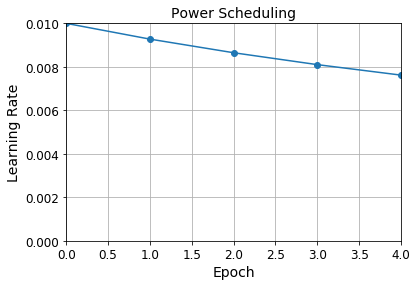

In [14]:
# plotting the learning rate by epoch for power scheduling
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [15]:
# defining exponential decay
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [16]:
# defining exponential decay without hardcoding
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [17]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 5

In [18]:
# LearningRateScheduler update the optimizer’s learning_rate
# attribute at the beginning of each epoch
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 145us/sample - loss: 0.9703 - accuracy: 0.7344 - val_loss: 0.8451 - val_accuracy: 0.7642
Epoch 2/5
25000/25000 [==============================] - 3s 114us/sample - loss: 0.6797 - accuracy: 0.7863 - val_loss: 1.2915 - val_accuracy: 0.6454
Epoch 3/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.6090 - accuracy: 0.8094 - val_loss: 1.7539 - val_accuracy: 0.6522
Epoch 4/5
25000/25000 [==============================] - 3s 115us/sample - loss: 0.5586 - accuracy: 0.8259 - val_loss: 1.5897 - val_accuracy: 0.7072
Epoch 5/5
25000/25000 [==============================] - 3s 118us/sample - loss: 0.4868 - accuracy: 0.8445 - val_loss: 0.5465 - val_accuracy: 0.8442


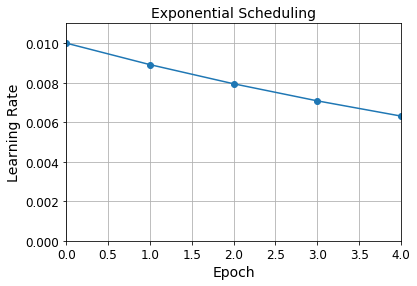

In [19]:
# plotting the learning rate by epoch for exponential scheduling
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [20]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [21]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0) # using Nadam optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]) # compiling the model
n_epochs = 5

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 154us/sample - loss: 0.8872 - accuracy: 0.7535 - val_loss: 1.0513 - val_accuracy: 0.6950
Epoch 2/5
25000/25000 [==============================] - 3s 134us/sample - loss: 0.6712 - accuracy: 0.7894 - val_loss: 0.9573 - val_accuracy: 0.7528
Epoch 3/5
25000/25000 [==============================] - 3s 128us/sample - loss: 0.5962 - accuracy: 0.8142 - val_loss: 0.6722 - val_accuracy: 0.7912
Epoch 4/5
25000/25000 [==============================] - 3s 124us/sample - loss: 0.4969 - accuracy: 0.8376 - val_loss: 0.6724 - val_accuracy: 0.7862
Epoch 5/5
25000/25000 [==============================] - 3s 124us/sample - loss: 0.4499 - accuracy: 0.8501 - val_loss: 0.6368 - val_accuracy: 0.8200


In [22]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

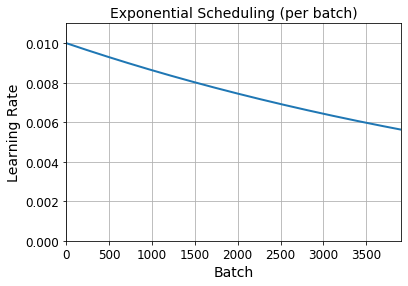

In [23]:
# plotting the learning rate by epoch for exponential scheduling
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [88]:
# defining the epoch for piecewise constant scheduling
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [89]:
# defining piecewise constant scheduling
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

# calling the function
piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [90]:
# creating an instance of the LearningRateScheduler
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 5

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 139us/sample - loss: 0.9226 - accuracy: 0.7452 - val_loss: 1.4468 - val_accuracy: 0.6448
Epoch 2/5
25000/25000 [==============================] - 3s 108us/sample - loss: 0.7608 - accuracy: 0.7668 - val_loss: 1.0174 - val_accuracy: 0.7112
Epoch 3/5
25000/25000 [==============================] - 3s 114us/sample - loss: 0.7754 - accuracy: 0.7734 - val_loss: 0.7917 - val_accuracy: 0.7908
Epoch 4/5
25000/25000 [==============================] - 3s 117us/sample - loss: 0.8074 - accuracy: 0.7744 - val_loss: 0.7958 - val_accuracy: 0.7884
Epoch 5/5
25000/25000 [==============================] - 3s 139us/sample - loss: 0.8200 - accuracy: 0.7686 - val_loss: 1.0198 - val_accuracy: 0.7006


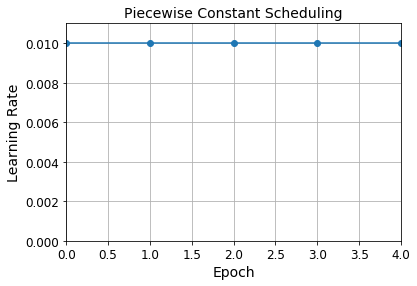

In [91]:
# plotting the learning rate by epoch for piecewise scheduling
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [92]:
tf.random.set_seed(42)
np.random.seed(42)

In [24]:
# using ReduceLROnPlateau callback for performance scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9) # using momentum optimizer

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 109us/sample - loss: 0.6731 - accuracy: 0.7848 - val_loss: 0.5307 - val_accuracy: 0.8226
Epoch 2/5
25000/25000 [==============================] - 2s 96us/sample - loss: 0.5291 - accuracy: 0.8264 - val_loss: 0.5382 - val_accuracy: 0.8398
Epoch 3/5
25000/25000 [==============================] - 2s 95us/sample - loss: 0.4859 - accuracy: 0.8400 - val_loss: 0.4934 - val_accuracy: 0.8408
Epoch 4/5
25000/25000 [==============================] - 2s 95us/sample - loss: 0.4593 - accuracy: 0.8492 - val_loss: 0.5844 - val_accuracy: 0.8150
Epoch 5/5
25000/25000 [==============================] - 2s 93us/sample - loss: 0.4765 - accuracy: 0.8508 - val_loss: 0.5583 - val_accuracy: 0.8328


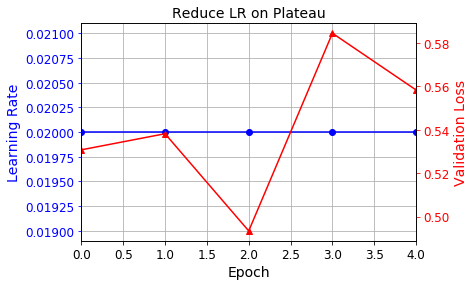

In [25]:
# plotting the learning rate by epoch for ReduceLROnPleatue
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1) # get current axes
plt.grid(True)

ax2 = plt.gca().twinx() # create twin axes
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [ ]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 2s 98us/sample - loss: 0.5468 - accuracy: 0.8044 - val_loss: 0.4855 - val_accuracy: 0.8278
Epoch 2/5
25000/25000 [==============================] - 2s 84us/sample - loss: 0.4135 - accuracy: 0.8519 - val_loss: 0.4266 - val_accuracy: 0.8510
Epoch 3/5
25000/25000 [==============================] - 2s 84us/sample - loss: 0.3739 - accuracy: 0.8670 - val_loss: 0.3985 - val_accuracy: 0.8630
Epoch 4/5
25000/25000 [==============================] - 2s 85us/sample - loss: 0.3491 - accuracy: 0.8751 - val_loss: 0.4018 - val_accuracy: 0.8574
Epoch 5/5
22848/25000 [==========================>...] - ETA: 0s - loss: 0.3329 - accuracy: 0.8807

For piecewise constant scheduling, try this:

In [96]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### 1Cycle scheduling

Read the following for more information on the 1Cycle policy by Leslie Smith:

https://arxiv.org/pdf/1803.09820.pdf

In [97]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback): # function to define learning rate
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10): # function to find learning rate
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses): # function to plot learning rate against loss
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [98]:
tf.random.set_seed(42)
np.random.seed(42)

# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 25000 samples
25000/25000 [==============================] - 1s 40us/sample - loss: nan - accuracy: 0.3392


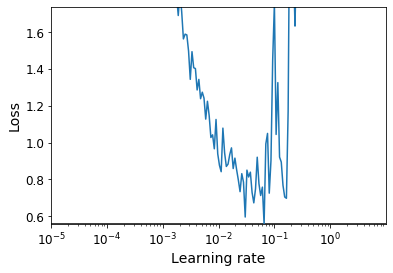

In [99]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [100]:
class OneCycleScheduler(keras.callbacks.Callback): # 1Cycle scheduler function
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [101]:
n_epochs = 5
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 1s 36us/sample - loss: 0.7365 - accuracy: 0.7454 - val_loss: 0.5076 - val_accuracy: 0.8248
Epoch 2/5
25000/25000 [==============================] - 1s 32us/sample - loss: 0.4699 - accuracy: 0.8326 - val_loss: 0.4883 - val_accuracy: 0.8290
Epoch 3/5
25000/25000 [==============================] - 1s 33us/sample - loss: 0.4111 - accuracy: 0.8522 - val_loss: 0.4323 - val_accuracy: 0.8510
Epoch 4/5
25000/25000 [==============================] - 1s 33us/sample - loss: 0.3567 - accuracy: 0.8699 - val_loss: 0.3995 - val_accuracy: 0.8632
Epoch 5/5
25000/25000 [==============================] - 1s 33us/sample - loss: 0.3293 - accuracy: 0.8844 - val_loss: 0.3898 - val_accuracy: 0.8632


# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [102]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [103]:
# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/2
25000/25000 [==============================] - 4s 163us/sample - loss: 2.5516 - accuracy: 0.8057 - val_loss: 0.9194 - val_accuracy: 0.7856
Epoch 2/2
25000/25000 [==============================] - 3s 118us/sample - loss: 0.7750 - accuracy: 0.8158 - val_loss: 0.7504 - val_accuracy: 0.8140


In [104]:
# creates a thin wrapper for any callable, with some default argument values
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/2
25000/25000 [==============================] - 4s 154us/sample - loss: 2.6252 - accuracy: 0.8046 - val_loss: 0.9143 - val_accuracy: 0.7870
Epoch 2/2
25000/25000 [==============================] - 4s 145us/sample - loss: 0.7771 - accuracy: 0.8168 - val_loss: 0.7485 - val_accuracy: 0.8184


## Dropout

In [105]:
# defining a model applying dropout regularization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/2
25000/25000 [==============================] - 5s 210us/sample - loss: 0.6922 - accuracy: 0.7719 - val_loss: 0.4411 - val_accuracy: 0.8440
Epoch 2/2
25000/25000 [==============================] - 3s 129us/sample - loss: 0.4691 - accuracy: 0.8292 - val_loss: 0.3749 - val_accuracy: 0.8662


## Alpha Dropout

In [106]:
tf.random.set_seed(42)
np.random.seed(42)

In [107]:
# using alpha dropout to define a model
# it keeps mean and variance of inputs to their original values
# in order to ensure the self-normalizing property even after this dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

# compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 5

# training the model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 130us/sample - loss: 0.7427 - accuracy: 0.7301 - val_loss: 0.7011 - val_accuracy: 0.8206
Epoch 2/5
25000/25000 [==============================] - 3s 112us/sample - loss: 0.6102 - accuracy: 0.7749 - val_loss: 0.6291 - val_accuracy: 0.8362
Epoch 3/5
25000/25000 [==============================] - 3s 112us/sample - loss: 0.5640 - accuracy: 0.7907 - val_loss: 0.6171 - val_accuracy: 0.8366
Epoch 4/5
25000/25000 [==============================] - 3s 113us/sample - loss: 0.5493 - accuracy: 0.7936 - val_loss: 0.5535 - val_accuracy: 0.8474
Epoch 5/5
25000/25000 [==============================] - 3s 113us/sample - loss: 0.5246 - accuracy: 0.8036 - val_loss: 0.5671 - val_accuracy: 0.8512


In [108]:
model.evaluate(X_test_scaled, y_test) # model evaluation on test

5000/5000 [==============================] - 0s 48us/sample - loss: 0.5935 - accuracy: 0.8372


[0.59354141061306, 0.8372]

In [109]:
model.evaluate(X_train_scaled, y_train) # model evaluation on train

25000/25000 [==============================] - 1s 47us/sample - loss: 0.5091 - accuracy: 0.8466


[0.509081173028946, 0.84664]

In [110]:
history = model.fit(X_train_scaled, y_train)

Train on 25000 samples
25000/25000 [==============================] - 3s 119us/sample - loss: 0.5129 - accuracy: 0.8086


## MC Dropout

In [111]:
tf.random.set_seed(42)
np.random.seed(42)

In [112]:
# making 100 predictions
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [113]:
np.round(model.predict(X_test_scaled[:1]), 2) # prediction for first instance

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

In [114]:
np.round(y_probas[:, :1], 2) # comparning with predictions made when dropout is activated

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.64, 0.  , 0.21]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.34, 0.  , 0.55, 0.  , 0.11]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.69, 0.  , 0.04, 0.  , 0.27]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.48, 0.01, 0.33]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.31, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.35, 0.02, 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.09, 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.03]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.06, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.91, 0.  , 0.01, 0.  , 0.08]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.  , 0.25, 0.  , 0.11]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.49, 0.  , 0

In [115]:
np.round(y_proba[:1], 2) # model prediction after we average over the first dimension

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.21, 0.  , 0.55]],
      dtype=float32)

In [116]:
# standard deviation of the probability estimates
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.18, 0.  , 0.28]],
      dtype=float32)

In [117]:
y_pred = np.argmax(y_proba, axis=1) # generating y_pred

In [118]:
# checking model accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.837

In [119]:
# replacing the Dropout layers with the following MCDropout class
# if your model contains other layers that behave in a special way
# during training (such as BatchNormalization layers)
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

# defining MCAlphaDropout by subclassing AlphaDropout
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [120]:
tf.random.set_seed(42)
np.random.seed(42)

In [121]:
# using the MCAlphaDropout
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [122]:
mc_model.summary() # model summary

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_262 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_263 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_264 (Dense)            (None, 10)              

In [123]:
# compiling the model
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [124]:
mc_model.set_weights(model.get_weights()) # setting weights

Now we can use the model with MC Dropout:

In [125]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.23, 0.  , 0.48]],
      dtype=float32)

## Max norm

In [126]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [127]:
# implementing max-norm regularization by setting max_norm
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

# defining model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])

# compiling model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2

# training model
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 25000 samples, validate on 5000 samples
Epoch 1/2
25000/25000 [==============================] - 4s 159us/sample - loss: 0.5422 - accuracy: 0.8110 - val_loss: 0.5103 - val_accuracy: 0.8274
Epoch 2/2
25000/25000 [==============================] - 3s 126us/sample - loss: 0.3890 - accuracy: 0.8562 - val_loss: 0.4113 - val_accuracy: 0.8552
